In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date = recent_date[0]
print(f"The most recent date in the dataset is: {most_recent_date}.")

The most recent date in the dataset is: 2017-08-23.


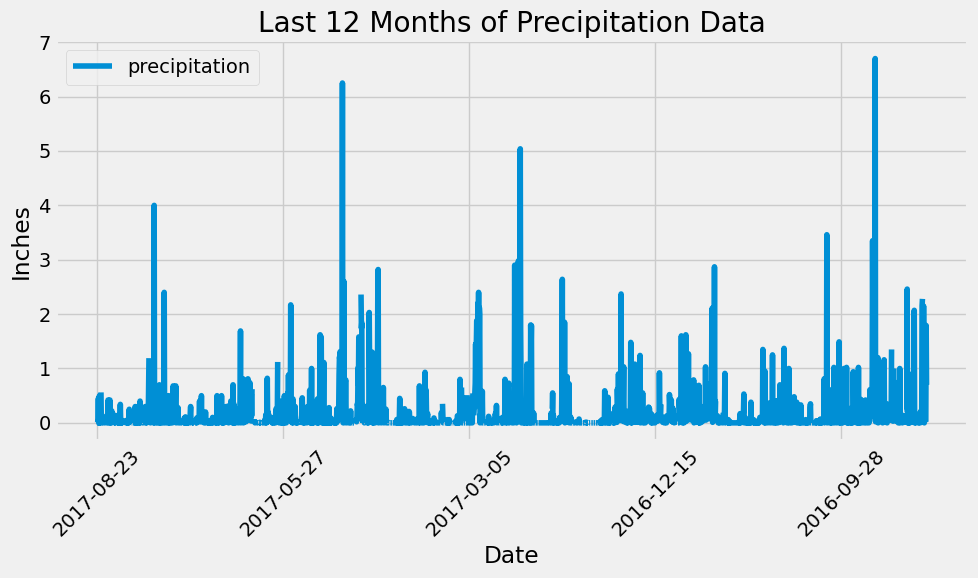

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results, 
# starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_old_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data_precipitation = session.query(measurement.date, measurement.prcp).\
filter(measurement.date >= (year_old_date)).order_by(measurement.date.desc())

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(data_precipitation, columns=['date', 'precipitation'])

# Use Pandas Plotting with Matplotlib to plot the data
fig = precipitation_df.plot(x='date', y='precipitation', figsize=(10, 6))

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Last 12 Months of Precipitation Data')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station.station).distinct().count()
print(f"There are {total_stations} total stations in the dataset.")

There are 9 total stations in the dataset.


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
counts = [station.station, func.count(measurement.station)]
most_active = session.query(*counts).filter(station.station == measurement.station).group_by(station.station).\
    order_by(func.count(measurement.station).desc()).all()

# Convert the results to a Pandas DataFrame
most_active_df = pd.DataFrame(most_active, columns=['Station ID', 'Count'])

# Print the formatted DataFrame
print(most_active_df)

    Station ID  Count
0  USC00519281   2772
1  USC00519397   2724
2  USC00513117   2709
3  USC00519523   2669
4  USC00516128   2612
5  USC00514830   2202
6  USC00511918   1979
7  USC00517948   1372
8  USC00518838    511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_temps = [func.min(measurement.tobs),
                 func.max(measurement.tobs),
                 func.avg(measurement.tobs)]

active_station = session.query(*station_temps).filter(measurement.station == 'USC00519281').all()

# Convert the results to a Pandas DataFrame
columns = ['Lowest Temperature', 'Highest Temperature', 'Average Temperature']
station_temps_df = pd.DataFrame(active_station, columns=columns)

# Print the formatted DataFrame
print(station_temps_df)

   Lowest Temperature  Highest Temperature  Average Temperature
0                54.0                 85.0            71.663781


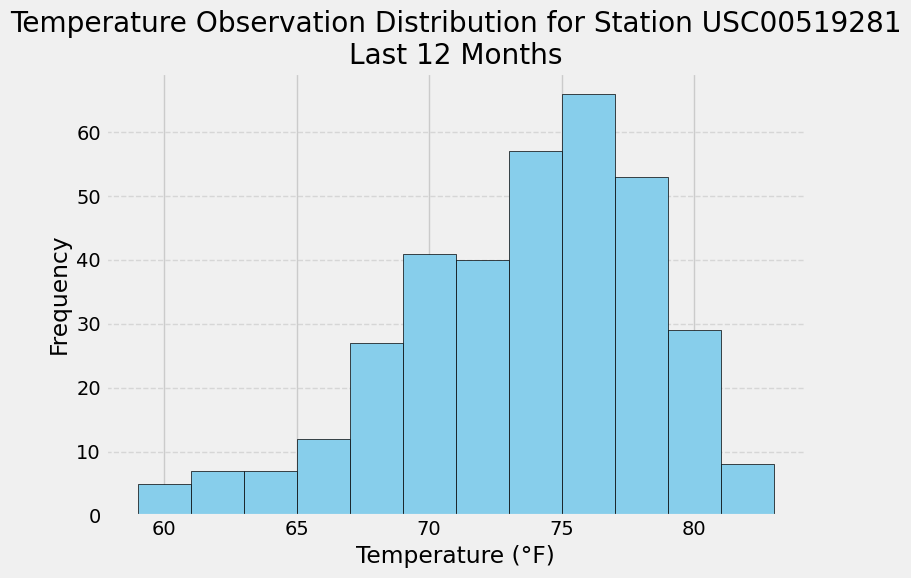

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_year_data = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == 'USC00519281', measurement.date >= year_old_date).all()

# Convert the results to a Pandas DataFrame
temp_year_data = pd.DataFrame(temp_year_data, columns=['date', 'temperature'])

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(temp_year_data['temperature'], bins=12, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Temperature Observation Distribution for Station USC00519281\nLast 12 Months')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


# Close Session

In [16]:
# Close Session
session.close()